## Importing Appropriate Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Appropriate Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd # to work with csv files

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import TfidfVectorizer

# pre-processing of text
import string
import re

# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# import different metrics to evaluate the classifiers
from sklearn import metrics

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# import time function from time module to track the training duration
from time import time

#basic imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import gzip
import shutil
from time import time

#pre-processing imports
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

#imports related to modeling
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Load the Data

In [ ]:
# connect colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import dataset
book_rating = pd.read_csv("/content/drive/MyDrive/Team_8_Project_Datasets_M1/Books_rating.csv")

In [ ]:
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
book_rating.shape

(3000000, 10)

## Data Exploration

In [ ]:
# general check on data shape
book_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [ ]:
# check the frequency of score level in the review/score Column
book_rating['review/score'].value_counts()

5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: review/score, dtype: int64

## Data Transformation

In [ ]:
# transform values 4-5 to value "Positive"; transform values 3 to value "Neutral"; and transform values 1-2 to value "Negative", for the Sentiment Column
book_rating['review/score'] = book_rating['review/score'].replace(5.0, 'Positive')
book_rating['review/score'] = book_rating['review/score'].replace(4.0, 'Positive')
book_rating['review/score'] = book_rating['review/score'].replace(3.0, 'Neutral')
book_rating['review/score'] = book_rating['review/score'].replace(2.0, 'Negative')
book_rating['review/score'] = book_rating['review/score'].replace(1.0, 'Negative')
book_rating['review/score'].value_counts()

Positive    2392959
Negative     352746
Neutral      254295
Name: review/score, dtype: int64

In [ ]:
# check how it looks
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,Positive,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,Positive,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,Positive,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,Positive,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,Positive,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Prepare the datasets for training

In [ ]:
# Balance the dataset
sample_size = 10000
df_positive = book_rating[(book_rating['review/score']=='Positive')].sample(n=sample_size, random_state=42)
df_neutral = book_rating[(book_rating['review/score']=='Neutral')].sample(n=sample_size, random_state=42)
df_negative = book_rating[(book_rating['review/score']=='Negative')].sample(n=sample_size, random_state=42)

our_data = pd.concat([df_positive, df_neutral, df_negative], ignore_index=True)
our_data = our_data[["review/text","review/score"]]

In [ ]:
# Check how it looks
print(our_data.shape)
print(our_data['review/score'].value_counts())

(30000, 2)
Positive    10000
Neutral     10000
Negative    10000
Name: review/score, dtype: int64


In [ ]:
# Check how it looks
our_data.head()

,review/text,review/score
0,Highly recommend this book. Very short but wel...,Positive
1,Jack Whyte continues his tale of Publius Varru...,Positive
2,This tale of her nightmares and subsequently u...,Positive
3,I'm an avid reader. I read everything from Ste...,Positive
4,The science of interpretting the hidden meanin...,Positive


In [ ]:
# Transform review/score column using label encoding: Positive = 2, Neutral = 1, Negative = 0
our_data['review/score'] = our_data['review/score'].replace('Positive', 2)
our_data['review/score'] = our_data['review/score'].replace('Neutral', 1)
our_data['review/score'] = our_data['review/score'].replace('Negative', 0)
our_data.head()

,review/text,review/score
0,Highly recommend this book. Very short but wel...,2
1,Jack Whyte continues his tale of Publius Varru...,2
2,This tale of her nightmares and subsequently u...,2
3,I'm an avid reader. I read everything from Ste...,2
4,The science of interpretting the hidden meanin...,2


In [ ]:
print(our_data['review/score'].value_counts())

2    10000
1    10000
0    10000
Name: review/score, dtype: int64


In [ ]:
our_data['review/score'].dtype

dtype('int64')

In [ ]:
# Prepare the data for our model trainning
import sklearn
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = our_data['review/text'].values.tolist() # the column 'review/text' contains textual data to extract features from
y = our_data['review/score'].values.tolist() # this is the column we are learning to predict.
print(len(X), len(y))
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

30000 30000
22500 22500
7500 7500


In [ ]:
# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

## Logistic Regression

### Text Representation: Basic Vectorization

In [ ]:
# Define the function for pre-processing our data for basic vectorization approach
import string
from sklearn.feature_extraction import _stop_words
from nltk.stem import PorterStemmer

stopwords = _stop_words.ENGLISH_STOP_WORDS

def clean(doc):
    # Replace </br> tags with spaces
    doc = doc.replace("</br>", " ")
    # Remove punctuation and digits, and lowercase the text
    doc = "".join([char.lower() for char in doc if char not in string.punctuation and not char.isdigit()])
    # Initialize the stemmer
    stemmer = PorterStemmer()
    # Tokenize, remove stopwords, and stem the words
    doc = " ".join([stemmer.stem(token) for token in doc.split() if token not in stopwords])
    return doc

#### TF-IDF 1-gram vectorization

In [ ]:
# Preprocess and Vectorize train and test data using TF-IDF Vectorization
tfidf_vec1 = TfidfVectorizer(preprocessor=clean, ngram_range = (1, 1)) # instantiate a vectoriezer
X_train_tfidf = tfidf_vec1.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_tfidf = tfidf_vec1.transform(X_test)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(22500, 85797) (7500, 85797)


Accuracy:  0.6396
Recall (macro): 0.6390384572405573
F1 score (macro): 0.6378491715889737


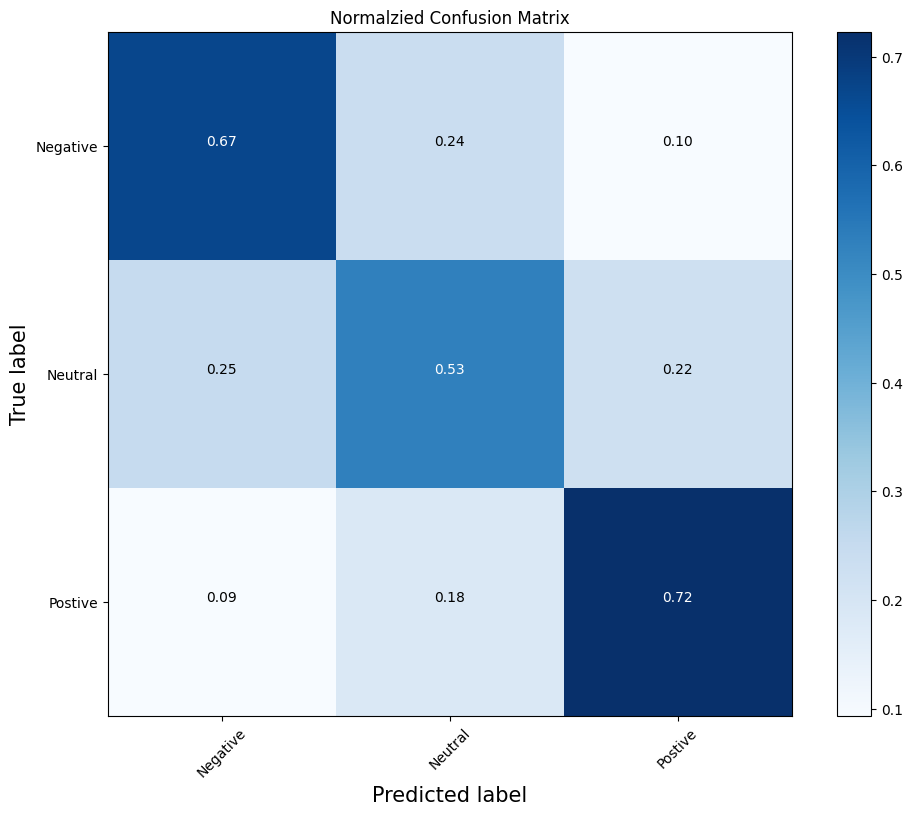

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_tfidf, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_tfidf)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

#### BOW 1-gram vectorization

In [ ]:
# Preprocess and Vectorize train and test data using Bag of Words Vectorization
BOW_vec1 = CountVectorizer(preprocessor=clean, ngram_range = (1, 1)) # instantiate a vectoriezer
X_train_BOW = BOW_vec1.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_BOW = BOW_vec1.transform(X_test)
print(X_train_BOW.shape, X_test_BOW.shape)

(22500, 85797) (7500, 85797)


Accuracy:  0.6168
Recall (macro): 0.616259841034024
F1 score (macro): 0.615337467853909


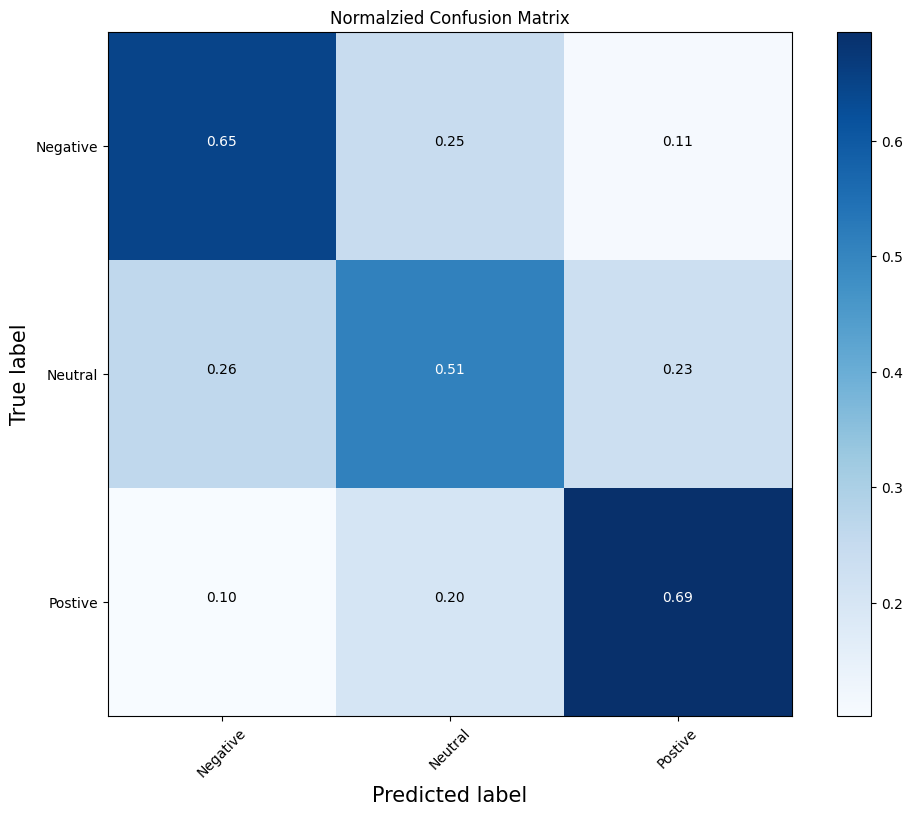

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_BOW, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_BOW)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

Generally, TF-IFD seems to perform better in this case.

#### TF-IDF 1+2 gram vectorization

In [ ]:
# Preprocess and Vectorize train and test data using TF-IDF Vectorization
tfidf_vec2 = TfidfVectorizer(preprocessor=clean, ngram_range = (1, 2)) # instantiate a vectoriezer
X_train_tfidf = tfidf_vec2.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_tfidf = tfidf_vec2.transform(X_test)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(22500, 1060973) (7500, 1060973)


Accuracy:  0.6478666666666667
Recall (macro): 0.6475101182403079
F1 score (macro): 0.6482099064520982


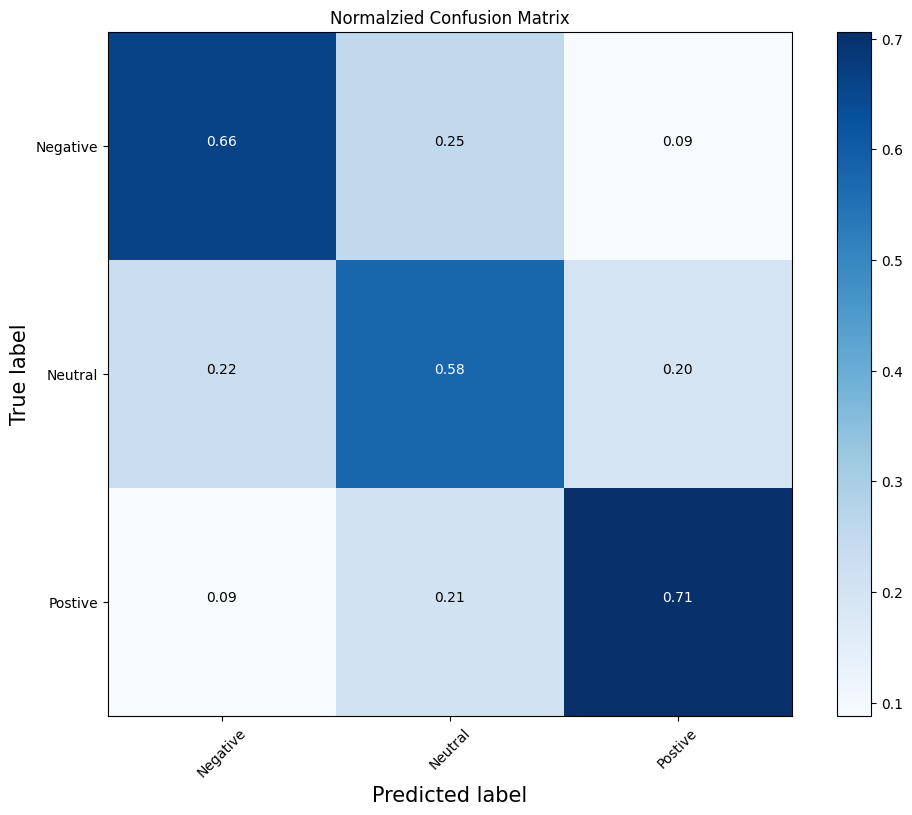

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_tfidf, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_tfidf)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

#### BOW 1+2 gram vectorization

In [ ]:
# Preprocess and Vectorize train and test data using Bag of Words Vectorization
BOW_vec2 = CountVectorizer(preprocessor=clean, ngram_range = (1, 2)) # instantiate a vectoriezer
X_train_BOW = BOW_vec2.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_BOW = BOW_vec2.transform(X_test)
print(X_train_BOW.shape, X_test_BOW.shape)

(22500, 1060973) (7500, 1060973)


Accuracy:  0.6492
Recall (macro): 0.6485807190812363
F1 score (macro): 0.6464590844227759


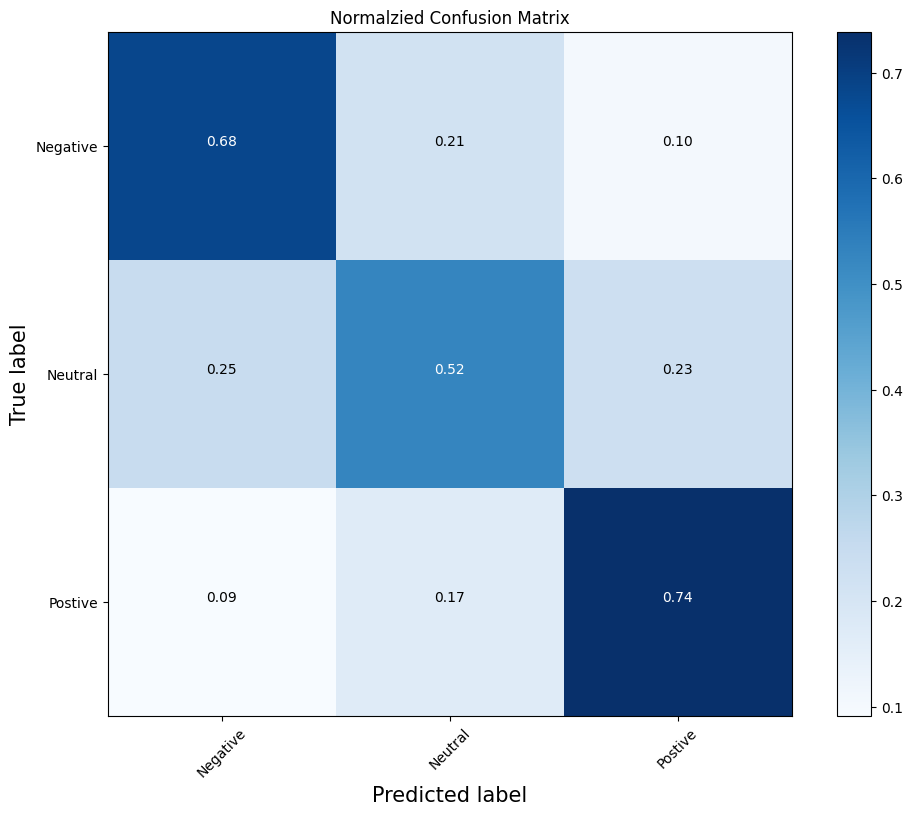

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_BOW, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_BOW)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

Including 2-grams in vectorization seems improve performance for both BOW and TF-IDF vectorization

#### TF-IDF 1+2+3 gram vectorization

In [ ]:
# Preprocess and Vectorize train and test data using TF-IDF Vectorization
tfidf_vec3 = TfidfVectorizer(preprocessor=clean, ngram_range = (1, 3)) # instantiate a vectoriezer
X_train_tfidf = tfidf_vec3.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_tfidf = tfidf_vec3.transform(X_test)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(22500, 2491024) (7500, 2491024)


Accuracy:  0.6417333333333334
Recall (macro): 0.6416219556092498
F1 score (macro): 0.6439402876054313


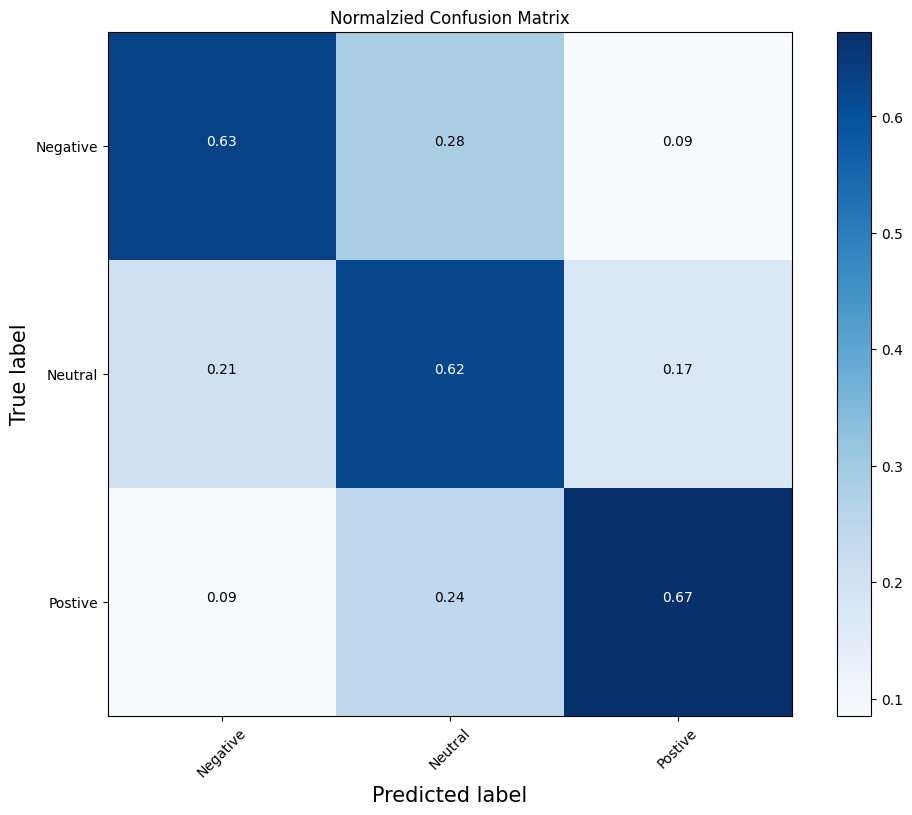

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_tfidf, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_tfidf)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

#### BOW 1+2+3 gram vectorization

In [ ]:
# Preprocess and Vectorize train and test data using Bag of Words Vectorization
BOW_vec3 = CountVectorizer(preprocessor=clean, ngram_range = (1, 3)) # instantiate a vectoriezer
X_train_BOW = BOW_vec3.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_BOW = BOW_vec3.transform(X_test)
print(X_train_BOW.shape, X_test_BOW.shape)

(22500, 2491024) (7500, 2491024)


Accuracy:  0.6494666666666666
Recall (macro): 0.6487933635481905
F1 score (macro): 0.6460495935237202


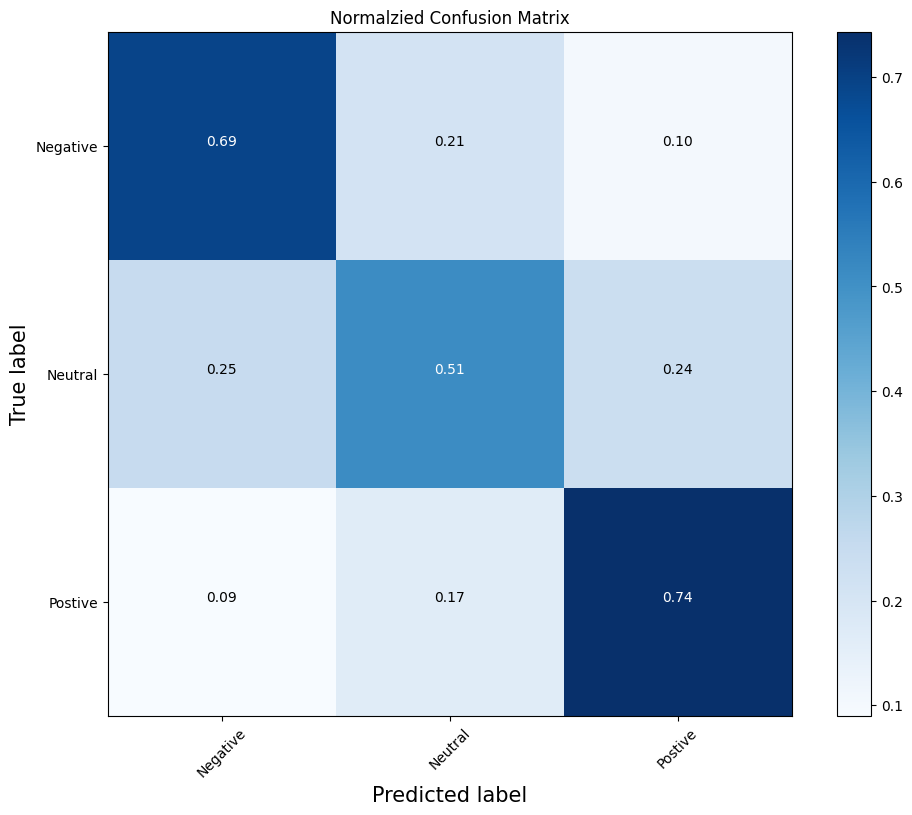

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train_BOW, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_BOW)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

Adding 3-grams to vectorization does not necessarily improve performance by much. For the purpose of saving calculating power, lets' stick with TF-IDF 1+2 grams vectorization.

### Text Representation: Word Embeddings

In [ ]:
# Define the clean function for word embeddings model
from nltk.stem import WordNetLemmatizer
mystopwords = set(stopwords.words("english"))
nltk.download('wordnet')

lemmatized = []
wn = WordNetLemmatizer()

def preprocess_corpus(texts):
    def remove_stops_digits(tokens):
        #Nested function that lowercases, removes stopwords and digits from a list of tokens
        tokens_new = [wn.lemmatize(word) for word in tokens ]
        return [token.lower() for token in tokens_new if token.lower() not in mystopwords and not token.isdigit()
               and token not in punctuation]
    #This return statement below uses the above function to process twitter tokenizer output further.
    return [remove_stops_digits(word_tokenize(text)) for text in texts]

[nltk_data] Downloading package wordnet to /root/nltk_data...


#### Preparing Word Embeddings - using glove 300 dimensions - and getting data ready for consumption

In [ ]:
# Download the pre-trained glove embeddings model
import gensim.downloader

#Load pre trained glove model from Gensim
w2v_model = gensim.downloader.load('glove-wiki-gigaword-300')

# Inspect the model
word2vec_vocab = w2v_model.key_to_index
# Inspect the # of words in the pre-trained model
print(len(word2vec_vocab))
# randomly pick a word 'dog' to inspect the vector dimension of the pre-trained model
print(len(w2v_model['dog']))

[==================================================] 100.0% 376.1/376.1MB downloaded
400000
300


In [ ]:
# Clean the texts for word embeddings
X = our_data['review/text'].values.tolist() # the column 'review/text' contains textual data to extract features from
y = our_data['review/score'].values.tolist() # this is the column we are learning to predict.

X = preprocess_corpus(X)
print(len(X), len(y))
print(X[1])
print(y[1])

30000 30000
['jack', 'whyte', 'continues', 'tale', 'publius', 'varrus', 'caius', 'brittanicus', 'formation', '``', 'colony', "''", 'camaloud', 'second', 'novel', 'series', 'legions', 'departed', 'arthur', "'s", 'great', 'grandparents', 'struggling', 'survival.whyte', "'s", 'strong', 'suit', 'faithfulness', 'historical', 'detail', 'departure', 'legions', 'pelagian', 'heresy', 'life', 'divided', 'crumbling', 'empire', 'invasion', 'post', 'roman', 'britain', 'saxons', '``', 'barbarian', '``', 'first', 'installment', 'whyte', "'s", 'description', 'detail', 'adult', 'sexual', 'situation', 'make', 'novel', 'young', 'easily', 'blush', 'however', "n't", 'condemnation', 'whyte', 'novel', 'simply', '``', 'adult', "''", 'oriented', 'average', 'fantasy', 'novel.another', 'strong', 'suite', 'whyte', 'character', 'development', 'character', 'grows', 'expands', 'story', 'evolves', 'furthermore', 'whyte', 'doe', "n't", 'make', 'character', 'caricature', 'common', 'fantasy', 'novel', 'example', 'publiu

In [ ]:
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists):
    DIMENSION = 300
    zero_vector = np.zeros(DIMENSION)
    feats = []
    for tokens in list_of_lists:
        feat_for_this =  np.zeros(DIMENSION)
        count_for_this = 0 + 1e-5 # to avoid divide-by-zero
        for token in tokens:
            if token in w2v_model:
                feat_for_this += w2v_model[token]
                count_for_this +=1
        if(count_for_this!=0):
            feats.append(feat_for_this/count_for_this)
        else:
            feats.append(zero_vector)
    return feats


train_vectors = embedding_feats(X)
print(len(train_vectors))

30000


In [ ]:
# Prepare the data for our model trainning
import sklearn
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Train-test split the data
X_train, X_test, y_train, y_test = train_test_split(train_vectors, y, random_state=42)

#### Fitting the model using glove 300 dimensions word embedding

Accuracy:  0.6006666666666667
Recall (macro): 0.6001416844373003
F1 score (macro): 0.5991833222388174


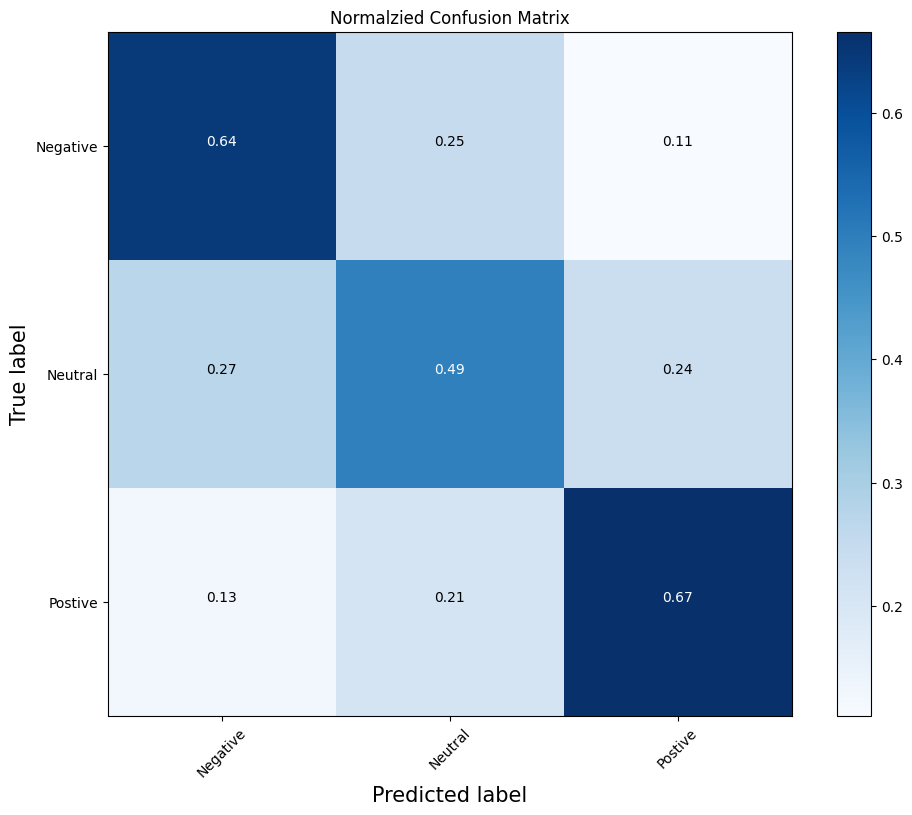

In [ ]:
# Fit a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(X_train, y_train) # fit the model with training data

# Make predictions on test data
preds = logreg.predict(X_test)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, preds))
print("Recall (macro):",metrics.recall_score(y_test, preds, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, preds, average='macro'))
cnf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

Word Embeddings vectorization seems to do a relatively bad job comparing to basic vectorization.

### TF-IDF 1+2 gram Vectorization Logistic Regression with Regularization Term (L2 - Ridge)

#### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz
import pydot
from io import StringIO

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc

#### Preparing Data

In [ ]:
# Define the function for pre-processing our data for basic vectorization approach
import string
from sklearn.feature_extraction import _stop_words
from nltk.stem import PorterStemmer

stopwords = _stop_words.ENGLISH_STOP_WORDS

def clean(doc):
    # Replace </br> tags with spaces
    doc = doc.replace("</br>", " ")
    # Remove punctuation and digits, and lowercase the text
    doc = "".join([char.lower() for char in doc if char not in string.punctuation and not char.isdigit()])
    # Initialize the stemmer
    stemmer = PorterStemmer()
    # Tokenize, remove stopwords, and stem the words
    doc = " ".join([stemmer.stem(token) for token in doc.split() if token not in stopwords])
    return doc

In [ ]:
# Function to plot confusion matrix.
# Ref:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
from sklearn.metrics import roc_auc_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)

In [ ]:
# Prepare the data for our model trainning
import sklearn
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Step 1: train-test split
X = our_data['review/text'].values.tolist() # the column 'review/text' contains textual data to extract features from
y = our_data['review/score'].values.tolist() # this is the column we are learning to predict.
print(len(X), len(y))
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

30000 30000
22500 22500
7500 7500


#### Model Training

In [ ]:
# Preprocess and Vectorize train and test data using TF-IDF 1+2 gram Vectorization
tfidf_vec = TfidfVectorizer(preprocessor=clean, ngram_range = (1, 2)) # instantiate a vectoriezer
X_train_tfidf = tfidf_vec.fit_transform(X_train) # use it to extract features from training data
# transform testing data (using training data's features)
X_test_tfidf = tfidf_vec.transform(X_test)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(22500, 1060973) (7500, 1060973)


let's try a random C (regularization strength) value and see whether there is improvement in performance comparing to the one with same text representation set up but without regularization term.

Accuracy:  0.6585333333333333
Recall (macro): 0.6581822657146768
F1 score (macro): 0.6589530891447429


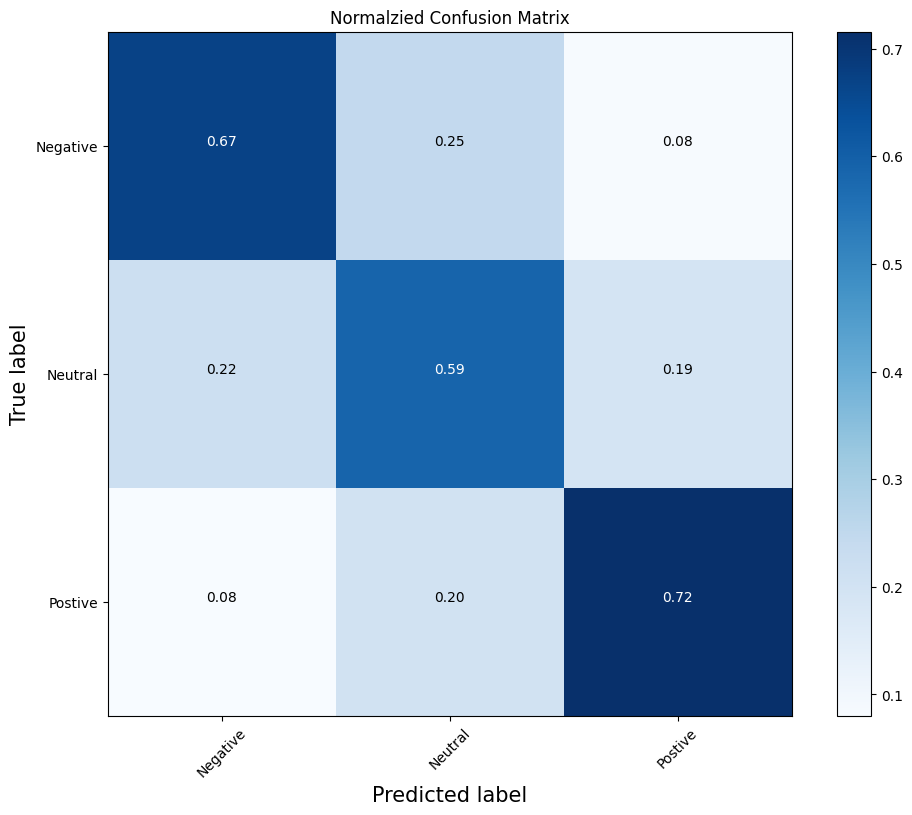

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(penalty='l2', C=4, class_weight = 'balanced', solver='saga', max_iter=2000) # instantiate a logistic regression model
logreg.fit(X_train_tfidf, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_tfidf)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

Looks like there are some slight improvement. Let's employ cross validation to tune the hyperparameter C (regularization strenghth) to see which level of C generates the optimal validation performance.

In [ ]:
C = [50, 40, 30, 20, 10, 5, 3, 1, 0.7, 0.5, 0.3, .1, 0.05,.01,.001]
mean_scores = []
for c in C:
  lassologcv_model = LogisticRegression(penalty='l2',C=c,class_weight = 'balanced',solver='saga',max_iter=2000)
  scores = cross_val_score(lassologcv_model, X_train_tfidf, y_train, cv=5, scoring="f1_macro")
  mean_score = np.mean(scores)
  mean_scores.append(mean_score)

print(mean_scores)

[0.638238232301128, 0.6380051947475243, 0.6385722255844108, 0.6384167129886311, 0.6398541268917163, 0.6412170468480451, 0.6413390878150752, 0.6389657584191342, 0.6356744331005937, 0.6321182820436342, 0.6256466034471415, 0.6114577224352027, 0.6051523297398422, 0.5961968482303732, 0.5932950144790883]


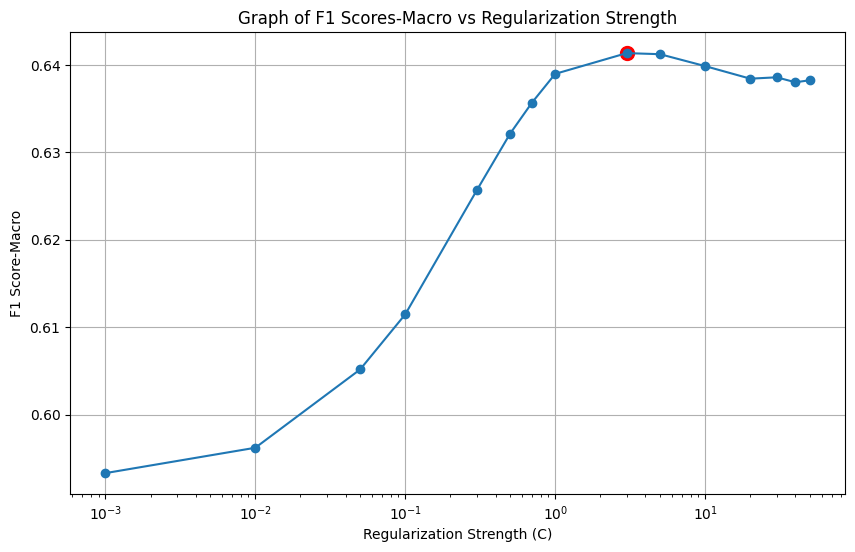

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(C, mean_scores, marker='o')

max_y_index = mean_scores.index(max(mean_scores))
max_y_value = mean_scores[max_y_index]
max_x_value = C[max_y_index]

# Adding title and labels for clarity
plt.scatter(max_x_value, max_y_value, color='red', s=100, label=f'Max F1 Score-Macro ({max_x_value}, {max_y_value})')
plt.xscale('log')
plt.title('Graph of F1 Scores-Macro vs Regularization Strength')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('F1 Score-Macro')
plt.grid(True)

# Show the plot
plt.show()

It seems like C=3 generates the best validation performance given the range of Cs. Let's narrow down the range a little bit more to see whether there are still space for improvements.

In [ ]:
C = [4.5, 4, 3.5, 3, 2.5, 2, 1.5]
mean_scores = []
for c in C:
  lassologcv_model = LogisticRegression(penalty='l2',C=c,class_weight = 'balanced',solver='saga',max_iter=2000)
  scores = cross_val_score(lassologcv_model, X_train_tfidf, y_train, cv=5, scoring="f1_macro")
  mean_score = np.mean(scores)
  mean_scores.append(mean_score)

print(mean_scores)

[0.6412012082248257, 0.6410897716997088, 0.6413215141296751, 0.6415351422694427, 0.641214796725069, 0.6414039508317141, 0.6407027682755354]


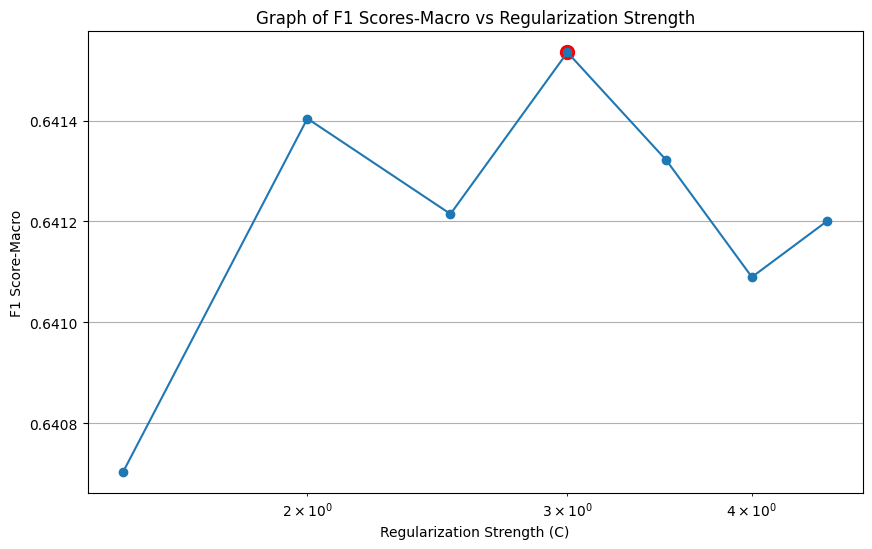

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(C, mean_scores, marker='o')

max_y_index = mean_scores.index(max(mean_scores))
max_y_value = mean_scores[max_y_index]
max_x_value = C[max_y_index]

# Adding title and labels for clarity
plt.scatter(max_x_value, max_y_value, color='red', s=100, label=f'Max F1 Score-Macro ({max_x_value}, {max_y_value})')
plt.xscale('log')
plt.title('Graph of F1 Scores-Macro vs Regularization Strength')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('F1 Score-Macro')
plt.grid(True)

# Show the plot
plt.show()

It seems like C=3 still generates the best validation performance. Let's stick with C=3 and fit the whole training set, and then see how it performs in the test set.

Accuracy:  0.6566666666666666
Recall (macro): 0.6563131245658256
F1 score (macro): 0.6571150695457076


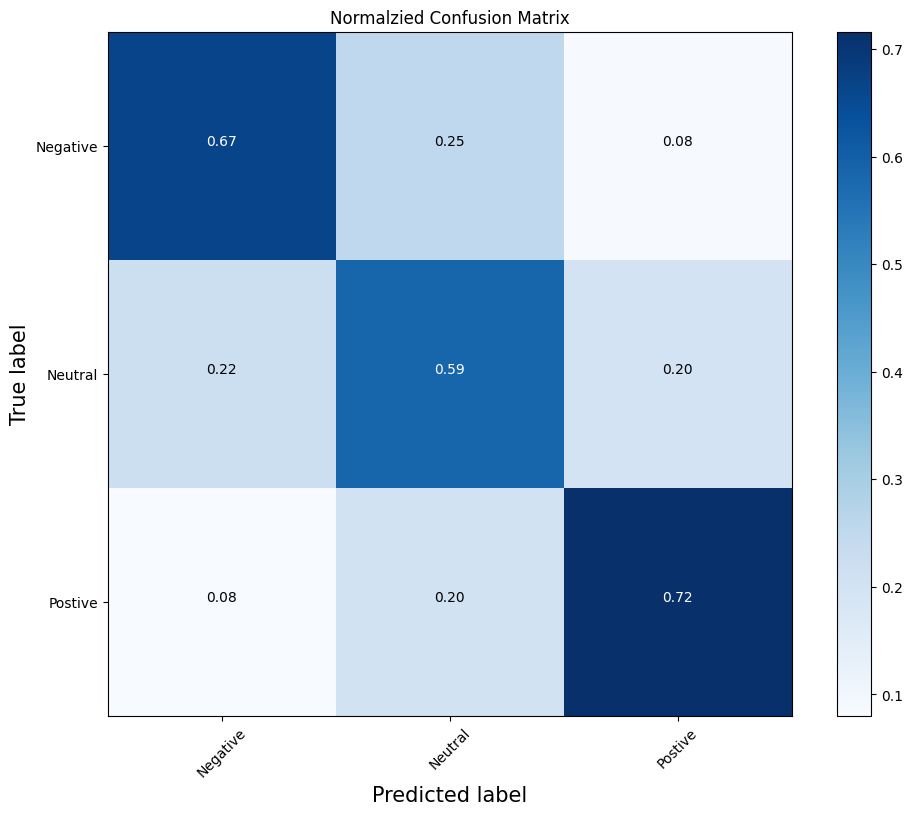

In [ ]:
from sklearn.linear_model import LogisticRegression # import

logreg = LogisticRegression(penalty='l2', C=3, class_weight = 'balanced', solver='saga', max_iter=2000) # instantiate a logistic regression model
logreg.fit(X_train_tfidf, y_train) # fit the model with training data

# Make predictions on test data
y_pred_class = logreg.predict(X_test_tfidf)

# calculate evaluation measures:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class))
print("Recall (macro):",metrics.recall_score(y_test, y_pred_class, average='macro'))
print("F1 score (macro):",metrics.f1_score(y_test, y_pred_class, average='macro'))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Postive'],normalize=True,
                      title='Normalzied Confusion Matrix')

It seems like there is a slight performance improvement comparing to the model with the same text-representation setup (IF-IDF 1+2 gram vectorization) but without the Ridge (L2) regularization term.